In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time 
from datetime import datetime
from scipy.stats import linregress


# Import the API key.
from config import weather_api_key



In [8]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities. 

cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the nearest cities list.
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [11]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 fo logging purposes. 
    if (i % 50 == 0 and i >= 50): 
        set_count += 1
        record_count = 1 
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try: 
        # Parse the JSON and retrieve the data. 
        city_weather = requests. get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity= city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(), 
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp, 
                          "Humidity": city_humidity, 
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced skip the city.
    except: 
        print("City not found. Skipping...")
        pass

# Indicate that the data loading is complete. 
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 1 | kendari
Processing Record 3 of Set 1 | nuuk
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | yar-sale
Processing Record 6 of Set 1 | paamiut
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | acarau
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | pergamino
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | galle
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | abu samrah
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | puerto madero
Processing Record 22 of Set 1 | thunder 

Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | barcelos
Processing Record 42 of Set 4 | regina
Processing Record 43 of Set 4 | eenhana
Processing Record 44 of Set 4 | margate
Processing Record 45 of Set 4 | nikolskoye
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | rantepao
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | hamilton
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | nantucket
Processing Record 2 of Set 5 | livingston
Processing Record 3 of Set 5 | manokwari
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 5 | kahului
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of Set 5 | tabulbah
City not found. Skipping...
Processing Record 10 of Set 5 | polistena
Processing Record 11 of Set 5 | barentsburg
City not found. Skipping...
Processing Recor

Processing Record 25 of Set 8 | sola
Processing Record 26 of Set 8 | camacha
Processing Record 27 of Set 8 | komsomolskiy
Processing Record 28 of Set 8 | winnemucca
Processing Record 29 of Set 8 | aripuana
Processing Record 30 of Set 8 | askiz
Processing Record 31 of Set 8 | banda aceh
Processing Record 32 of Set 8 | navalmoral de la mata
Processing Record 33 of Set 8 | bengkulu
Processing Record 34 of Set 8 | hovd
Processing Record 35 of Set 8 | svetlogorsk
Processing Record 36 of Set 8 | sorvag
City not found. Skipping...
Processing Record 37 of Set 8 | paradwip
City not found. Skipping...
Processing Record 38 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 39 of Set 8 | palembang
Processing Record 40 of Set 8 | nyurba
Processing Record 41 of Set 8 | carutapera
Processing Record 42 of Set 8 | seljord
Processing Record 43 of Set 8 | susah
City not found. Skipping...
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | kuching
Processing Recor

Processing Record 10 of Set 12 | half moon bay
Processing Record 11 of Set 12 | catacamas
Processing Record 12 of Set 12 | capitao poco
Processing Record 13 of Set 12 | ried
Processing Record 14 of Set 12 | boa vista
Processing Record 15 of Set 12 | rey bouba
Processing Record 16 of Set 12 | sergeyevka
Processing Record 17 of Set 12 | adrar
Processing Record 18 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 19 of Set 12 | pocosol
Processing Record 20 of Set 12 | vierzon
Processing Record 21 of Set 12 | vaasa
Processing Record 22 of Set 12 | cehegin
Processing Record 23 of Set 12 | ankang
Processing Record 24 of Set 12 | saint-denis
Processing Record 25 of Set 12 | hirna
Processing Record 26 of Set 12 | berbera
Processing Record 27 of Set 12 | dospat
Processing Record 28 of Set 12 | palkaka
City not found. Skipping...
Processing Record 29 of Set 12 | tshela
Processing Record 30 of Set 12 | olavarria
Processing Record 31 of Set 12 | tacuati
Processing Record 32 of 

In [13]:
len(city_data)

563

In [15]:
# Convert the array of dictionaries to a Pandas DF.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kendari,-3.9450,122.4989,74.35,96,100,2.28,ID,2022-04-17 17:41:24
1,Nuuk,64.1835,-51.7216,29.01,80,100,15.01,GL,2022-04-17 17:41:24
2,Carnarvon,-24.8667,113.6333,68.07,88,100,14.97,AU,2022-04-17 17:41:24
3,Yar-Sale,66.8333,70.8333,13.06,94,86,7.76,RU,2022-04-17 17:41:25
4,Paamiut,61.9940,-49.6678,29.41,77,100,3.91,GL,2022-04-17 17:41:25
5,Khatanga,71.9667,102.5000,7.79,96,99,11.92,RU,2022-04-17 17:41:26
6,Hasaki,35.7333,140.8333,52.29,68,58,7.58,JP,2022-04-17 17:41:26
7,Busselton,-33.6500,115.3333,57.72,64,43,2.24,AU,2022-04-17 17:41:26
8,Jamestown,42.0970,-79.2353,38.52,45,75,11.50,US,2022-04-17 17:38:16
9,Acarau,-2.8856,-40.1200,83.84,75,65,11.41,BR,2022-04-17 17:41:27


In [16]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kendari,ID,2022-04-17 17:41:24,-3.9450,122.4989,74.35,96,100,2.28
1,Nuuk,GL,2022-04-17 17:41:24,64.1835,-51.7216,29.01,80,100,15.01
2,Carnarvon,AU,2022-04-17 17:41:24,-24.8667,113.6333,68.07,88,100,14.97
3,Yar-Sale,RU,2022-04-17 17:41:25,66.8333,70.8333,13.06,94,86,7.76
4,Paamiut,GL,2022-04-17 17:41:25,61.9940,-49.6678,29.41,77,100,3.91
5,Khatanga,RU,2022-04-17 17:41:26,71.9667,102.5000,7.79,96,99,11.92
6,Hasaki,JP,2022-04-17 17:41:26,35.7333,140.8333,52.29,68,58,7.58
7,Busselton,AU,2022-04-17 17:41:26,-33.6500,115.3333,57.72,64,43,2.24
8,Jamestown,US,2022-04-17 17:38:16,42.0970,-79.2353,38.52,45,75,11.50
9,Acarau,BR,2022-04-17 17:41:27,-2.8856,-40.1200,83.84,75,65,11.41


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


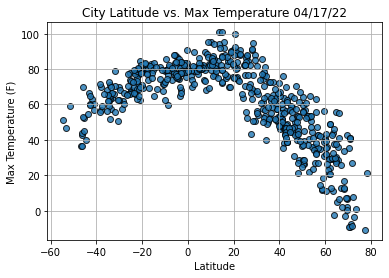

In [21]:
# Build the scatter plot for latitude vs. max temp.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

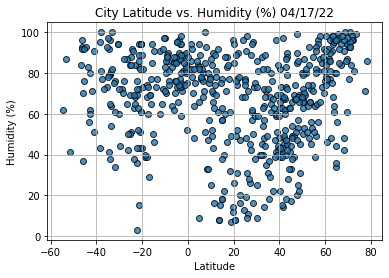

In [22]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

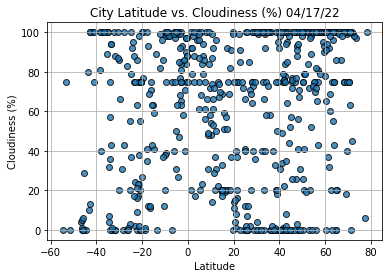

In [23]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

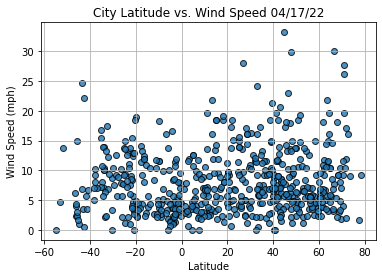

In [24]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [26]:
# Create a function to perform linear regression on weather data 
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                        Galle
Country                        LK
Date          2022-04-17 17:41:28
Lat                        6.0367
Lng                        80.217
Max Temp                    81.91
Humidity                       77
Cloudiness                     84
Wind Speed                   5.39
Name: 13, dtype: object

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nuuk,GL,2022-04-17 17:41:24,64.1835,-51.7216,29.01,80,100,15.01
3,Yar-Sale,RU,2022-04-17 17:41:25,66.8333,70.8333,13.06,94,86,7.76
4,Paamiut,GL,2022-04-17 17:41:25,61.9940,-49.6678,29.41,77,100,3.91
5,Khatanga,RU,2022-04-17 17:41:26,71.9667,102.5000,7.79,96,99,11.92
6,Hasaki,JP,2022-04-17 17:41:26,35.7333,140.8333,52.29,68,58,7.58


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

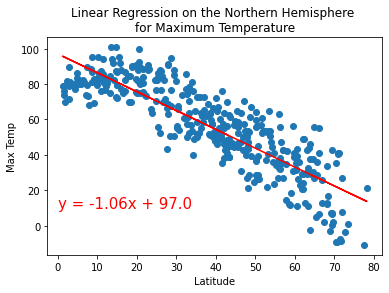

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(0,10))

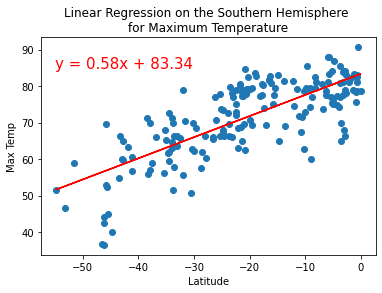

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-55,85))


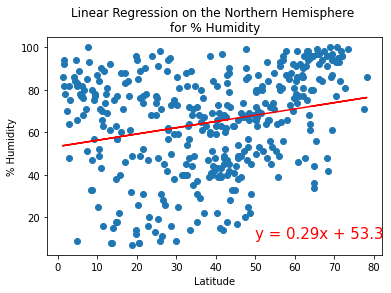

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(50,10))

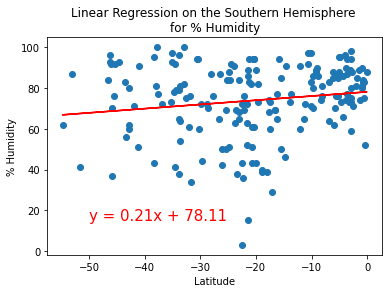

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

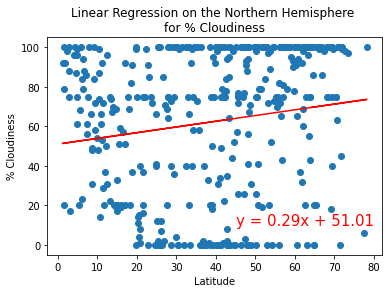

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(45,10))

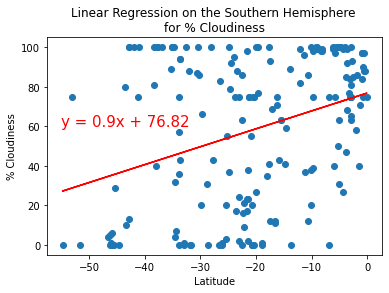

In [49]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,60))

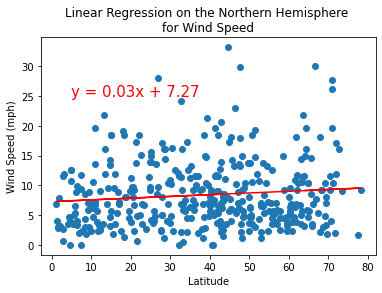

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(5,25))


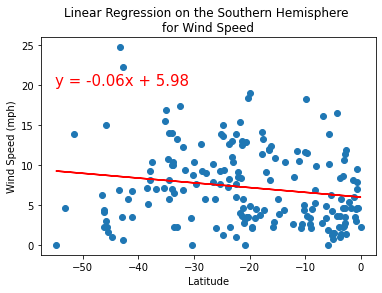

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(-55,20))
